<a href="https://colab.research.google.com/github/JakeOh/202205_itw_bd34/blob/main/da05_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 셋

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box Plot

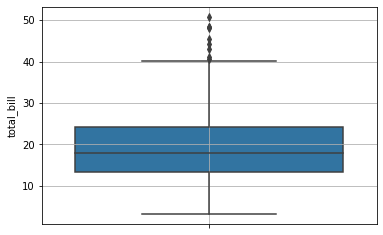

In [3]:
sns.boxplot(y='total_bill', data=tips)
plt.grid()
plt.show()

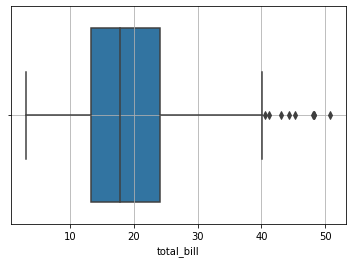

In [4]:
sns.boxplot(x='total_bill', data=tips)
plt.grid()
plt.show()

성별 tip의 box plot

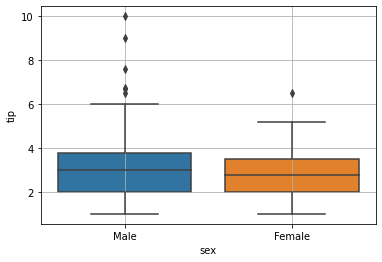

In [5]:
sns.boxplot(x='sex', y='tip', data=tips)
plt.grid()
plt.show()

In [6]:
tips[tips.sex == 'Male'].tip.describe()

count    157.000000
mean       3.089618
std        1.489102
min        1.000000
25%        2.000000
50%        3.000000
75%        3.760000
max       10.000000
Name: tip, dtype: float64

In [7]:
tips[tips.sex == 'Female'].tip.describe()

count    87.000000
mean      2.833448
std       1.159495
min       1.000000
25%       2.000000
50%       2.750000
75%       3.500000
max       6.500000
Name: tip, dtype: float64

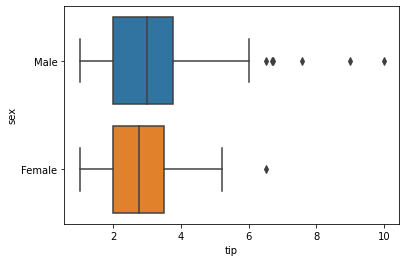

In [8]:
sns.boxplot(x='tip', y='sex', data=tips)
plt.show()

요일별 tip의 box plot

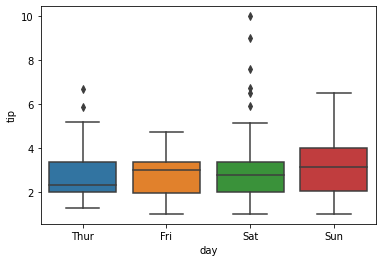

In [9]:
sns.boxplot(x='day', y='tip', data=tips)
plt.show()

Subplot을 생성해서 각각 그래프 그리기

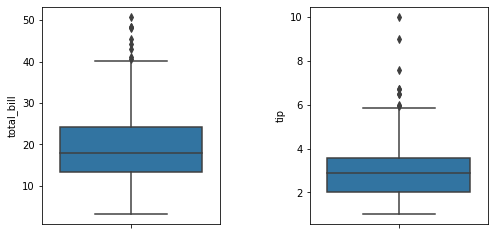

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sns.boxplot(y='total_bill', data=tips, ax=ax[0])
sns.boxplot(y='tip', data=tips, ax=ax[1])

plt.subplots_adjust(wspace=0.5)
plt.show()

2개의 Subplot에 흡연여부별 tip, 시간별 tip의 box plot

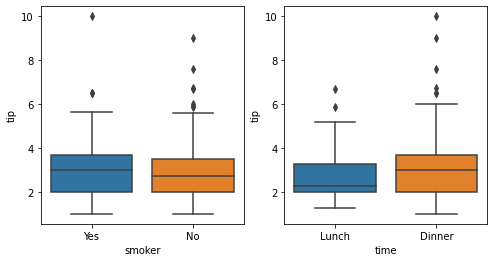

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sns.boxplot(x='smoker', y='tip', data=tips, ax=ax[0])
sns.boxplot(x='time', y='tip', data=tips, ax=ax[1])

plt.show()

# Histogram

 total_bill 히스토그램을 세로 막대로 표현

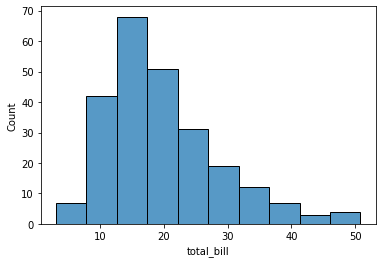

In [12]:
sns.histplot(x='total_bill', data=tips, bins=10)
plt.show()

total_bill 히스토그램을 가로 막대로 표현

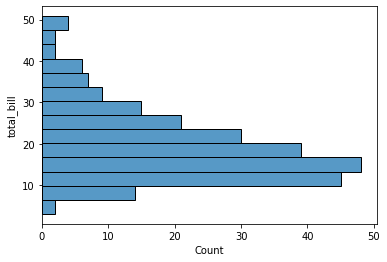

In [13]:
sns.histplot(y='total_bill', data=tips)
plt.show()

*   Subplot 2개를 상/하로 생성.
*   위쪽 Subplot에는 tip의 box plot을 가로 방향으로 그림.
*   아래쪽 Subplot에는 tip의 히스토그램을 그림.

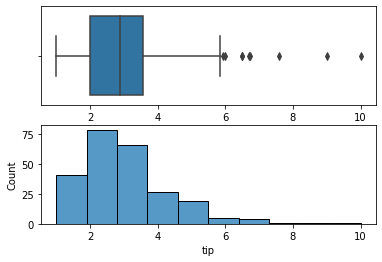

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=1)

sns.boxplot(x='tip', data=tips, ax=ax[0])
sns.histplot(x='tip', data=tips, ax=ax[1], bins=10)

plt.show()

# Bar plot

## `countplot()`

카테고리 타입 변수(컬럼)의 빈도수(count, frequency)를 막대로 표현한 그래프

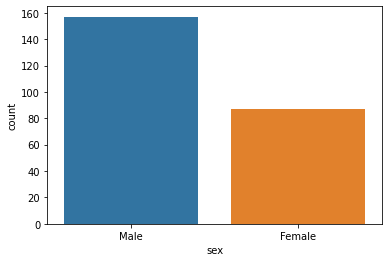

In [15]:
# 성별 빈도수
sns.countplot(x='sex', data=tips)
plt.show()

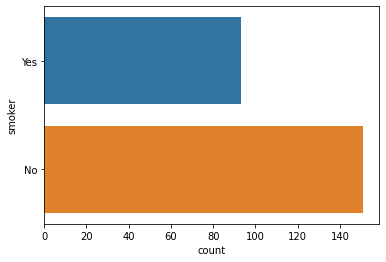

In [16]:
# 흡연자/비흡연자 수 가로 막대 그래프
sns.countplot(y='smoker', data=tips)
plt.show()

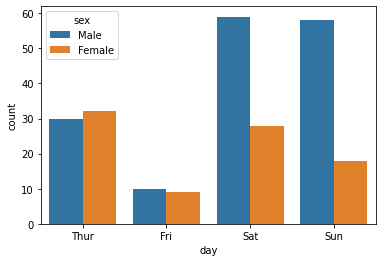

In [22]:
# 요일별 성별 빈도수
sns.countplot(x='day', hue='sex', data=tips)
# hue 파라미터: 카테고리 별로 색깔을 다르게 시각화할 때
plt.show()

In [18]:
tips[tips['day'] == 'Thur']['sex'].value_counts()
# tips[tips.day == 'Thur'].sex.value_counts()

Female    32
Male      30
Name: sex, dtype: int64

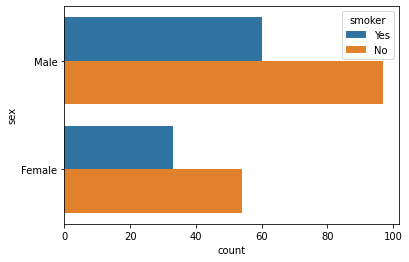

In [23]:
# 성별 흡연/비흡연자 수 가로 막대 그래프
sns.countplot(y='sex', hue='smoker', data=tips)
plt.show()

In [24]:
# 남성 흡연/비흡연자 수
tips[tips['sex'] == 'Male']['smoker'].value_counts()

No     97
Yes    60
Name: smoker, dtype: int64

## `barplot()`

*   그룹별 변수(컬럼)의 기술 통계량(평균, 중앙값, 최댓값, ...)을 막대로 시각화.
*   카테고리 타입 변수와 연속형 변수의 통계량을 함께 시각화.

In [26]:
# 남성 tip의 평균
tips[tips['sex'] == 'Male']['tip'].mean()

3.0896178343949052

In [28]:
# 여성 tip의 평균
tips[tips.sex == 'Female'].tip.mean()

2.833448275862069

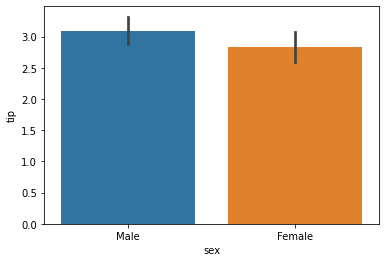

In [29]:
sns.barplot(x='sex', y='tip', data=tips)
# estimator 파라미터: 연속형 변수의 통계량을 계산할 함수를 지정. 기본값은 mean 함수.
plt.show()

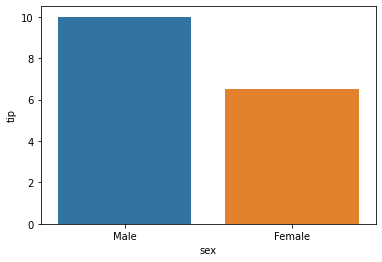

In [34]:
# 성별 tip의 최댓값
sns.barplot(x='sex', y='tip', data=tips, estimator=np.max, ci=None)
# ci 파라미터: confidence interval(신뢰구간). 기본값은 'sd'.
plt.show()

In [31]:
tips[tips['sex'] == 'Male']['tip'].max()

10.0

In [32]:
tips[tips.sex == 'Female'].tip.max()

6.5

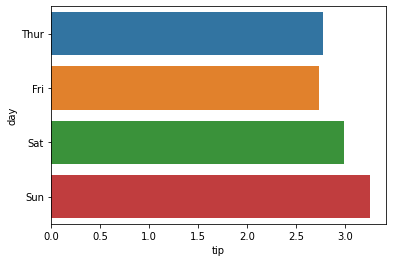

In [36]:
# 요일별 tip의 평균 가로 막대 그래프
sns.barplot(x='tip', y='day', data=tips, ci=None)
plt.show()

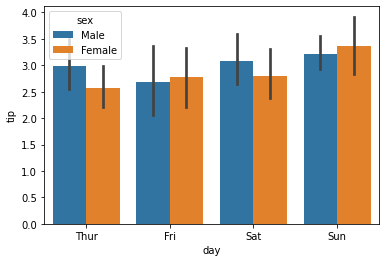

In [37]:
# 요일별 성별 tip의 평균 세로 막대 그래프
sns.barplot(x='day', y='tip', hue='sex', data=tips)
plt.show()

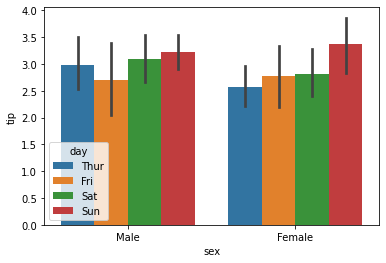

In [38]:
sns.barplot(x='sex', y='tip', hue='day', data=tips)
plt.show()

# 산점도(Scatter plot)

## `scatterplot()`

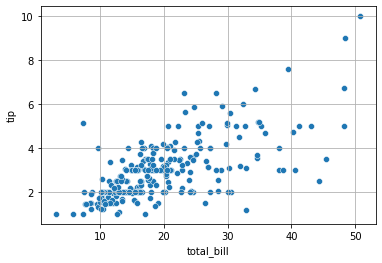

In [40]:
# tip ~ total_bill
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.grid()
plt.show()

## `regplot()`

regression plot: 산점도 + 선형 회귀 직선

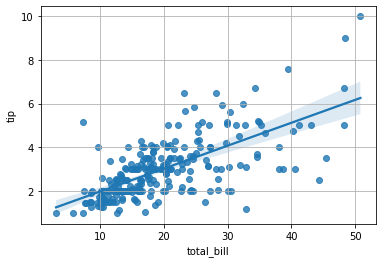

In [41]:
sns.regplot(x='total_bill', y='tip', data=tips)
plt.grid()
plt.show()

## `jointplot()`

joint plot: 산점도 + 히스토그램

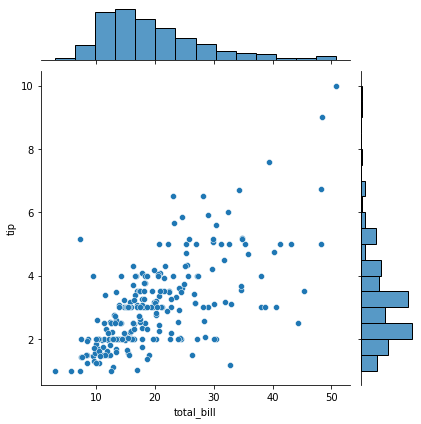

In [44]:
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

tip ~ total_bill 산점도. marker의 색깔을 성별에 따라 다르게 시각화.

tip ~ total_bill 산점도. marker의 색깔은 성별에 따라서, marker의 크기를 인원수에 따라서 다르게 시각화.

tip ~ total_bill 산점도. marker 색깔은 성별에 따라서, marker 모양을 흡연여부에 따라서 다르게 시각화.